# Bag of Words:

In [20]:
import numpy as np
import pandas as pd

In [21]:
df = pd.DataFrame({"text":["people watch movies",
                          "movies watch movies",
                          "people write comments"],
                   "output":[1,1,0]
    
})
df

,text,output
0,people watch movies,1
1,movies watch movies,1
2,people write comments,0


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [23]:
bow = cv.fit_transform(df['text'])

In [24]:
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'movies': 1, 'write': 4, 'comments': 0}


`vocabulary_` is a Python dictionary created after fitting the model (fit() or fit_transform()). It maps each unique word (token) in our dataset to a column index in the Bag of Words (BoW) matrix.

In [25]:
bow.toarray()

array([[0, 1, 1, 1, 0],
       [0, 2, 0, 1, 0],
       [1, 0, 1, 0, 1]], dtype=int64)

In [26]:
print(bow[0].toarray())

[[0 1 1 1 0]]


In [27]:
#new
cv.transform(['Chetan watch movies']).toarray()

array([[0, 1, 0, 1, 0]], dtype=int64)

In [28]:
X = bow.toarray()
y = df['output']            #Now we can pass data to the model

## N gram:

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))
bow = cv.fit_transform(df['text'])

In [31]:
print(cv.vocabulary_)

{'people watch': 1, 'watch movies': 3, 'movies watch': 0, 'people write': 2, 'write comments': 4}


In [32]:
bow.toarray()

array([[0, 1, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [0, 0, 1, 0, 1]], dtype=int64)

## TF-IDF(Term Frequency - Inverse Document Frequency):
An improved BOW variant.Instead of raw counts, it gives weight to words: High if a word is frequent in a document but rare across the corpus. Low if the word is very common everywhere (like “the”, “is”).

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
arr = tfid.fit_transform(df['text']).toarray()
arr

array([[0.        , 0.57735027, 0.57735027, 0.57735027, 0.        ],
       [0.        , 0.89442719, 0.        , 0.4472136 , 0.        ],
       [0.62276601, 0.        , 0.4736296 , 0.        , 0.62276601]])

In [40]:
print(tfid.idf_)

[1.69314718 1.28768207 1.28768207 1.28768207 1.69314718]


### Word2Vec:
Word2Vec is a technique that converts words into numerical vectors (embeddings) so that similar words are closer in meaning in vector space.

In [1]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
    --------------------------------------- 0.5/24.0 MB 2.1 MB/s eta 0:00:12
   - -------------------------------------- 0.8/24.0 MB 1.7 MB/s eta 0:00:14
   - -------------------------------------- 0.8/24.0 MB 1.7 MB/s eta 0:00:14
   -- ------------------------------------- 1.3/24.0 MB 1.3 MB/s eta 0:00:18
   -- ------------------------------------- 1.6/24.0 MB 1.4 MB/s eta 0:00:17
   --- ------------------------------------ 2.4/24.0 MB 1.7 MB/s eta 0:00:13
   ---- ----------------------------------- 2.9/24.0 MB 1.9 MB/s eta 0:00:12
   ------ --------------------------------- 3.7/24.0 MB 2.0 MB/s eta 0:00:10
   ------ --------------------------------- 3.9/24.0 MB 2.1 MB/s eta 0:00:10
   ------ --------------------------------- 4.2/24.0 MB 2.0 MB/s eta 0:00:11
   ------- -------------------------------- 4.7/24.0 MB 2.0 MB/s eta 0:00:10
   -------- -


[notice] A new release of pip is available: 25.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


`gensim “Generate Similar”` It’s an open source Python library designed for topic modeling, NLP, and document similarity analysis. It is widely used for unsupervised learning of text representations.

In [3]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.8 MB 1.9 MB/s eta 0:00:01
   ----------------------------- ---------- 1.3/1.8 MB 2.0 MB/s eta 0:00:01
   ----------------------------------- ---- 1.6/1.8 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0
    Uninstalling pip-25.0:
      Successfully uninstalled pip-25.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
import gensim
import os
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cheta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess

story = []

with open(r"C:\Users\cheta\Desktop\Generative_AI\Dataset\Game_of_Thrones.txt", "r", encoding="utf-8") as f:
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

print(story[:5])  

[['game', 'of', 'thrones', 'book', 'one', 'of', 'song', 'of', 'ice', 'and', 'fire', 'by', 'george', 'martin', 'prologue', 'we', 'should', 'start', 'back', 'gared', 'urged', 'as', 'the', 'woods', 'began', 'to', 'grow', 'dark', 'around', 'them'], ['the', 'wildlings', 'are', 'dead'], ['do', 'the', 'dead', 'frighten', 'you'], ['ser', 'waymar', 'royce', 'asked', 'with', 'just', 'the', 'hint', 'of', 'smile'], ['gared', 'did', 'not', 'rise', 'to', 'the', 'bait']]


In [9]:
story[0]

['game',
 'of',
 'thrones',
 'book',
 'one',
 'of',
 'song',
 'of',
 'ice',
 'and',
 'fire',
 'by',
 'george',
 'martin',
 'prologue',
 'we',
 'should',
 'start',
 'back',
 'gared',
 'urged',
 'as',
 'the',
 'woods',
 'began',
 'to',
 'grow',
 'dark',
 'around',
 'them']

In [10]:
model = gensim.models.Word2Vec(window=10, min_count=2)

In [11]:
 model.build_vocab(story)

In [13]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(1058199, 1423500)

In [14]:
model.wv.most_similar('daenerys')

[('sellsword', 0.9947555065155029),
 ('arakh', 0.9945714473724365),
 ('tomard', 0.9944528937339783),
 ('eunuch', 0.9943556785583496),
 ('dull', 0.9940035939216614),
 ('restless', 0.9937202334403992),
 ('inn', 0.9935469031333923),
 ('stolen', 0.9932444095611572),
 ('damp', 0.993061363697052),
 ('mycah', 0.9927838444709778)]

In [15]:
model.wv.similarity('arya','sansa')

0.9692258

In [19]:
model.wv['deep'].shape

(100,)

In [20]:
vec = model.wv.get_normed_vectors()
vec

array([[-0.01794605,  0.04397758, -0.03696321, ..., -0.13696195,
         0.0201353 ,  0.11625122],
       [ 0.00074872,  0.1042759 ,  0.00652107, ..., -0.16866046,
         0.03891385,  0.04943926],
       [-0.16775754,  0.02611815,  0.03883417, ..., -0.04931275,
         0.05818661, -0.1238498 ],
       ...,
       [-0.10089817, -0.08610658,  0.05358092, ..., -0.12319861,
         0.05023183, -0.09563853],
       [ 0.02127735,  0.07517019, -0.0100141 , ..., -0.15361966,
        -0.0098684 ,  0.00422992],
       [-0.00761612,  0.10934677, -0.01323371, ..., -0.15988217,
         0.04802461, -0.04071629]], dtype=float32)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X=pca.fit_transform(model.wv.get_normed_vectors())
X

array([[-0.38900602,  0.14975232,  0.34126675],
       [-0.47252584,  0.06224984,  0.21955961],
       [ 0.39796478,  0.11849034, -0.00936055],
       ...,
       [ 0.37722424,  0.15573978, -0.23981065],
       [-0.41105452, -0.00600046,  0.14279673],
       [-0.17184907, -0.02027613, -0.06335989]], dtype=float32)

In [23]:
X.shape

(7432, 3)

In [43]:
%matplotlib inline

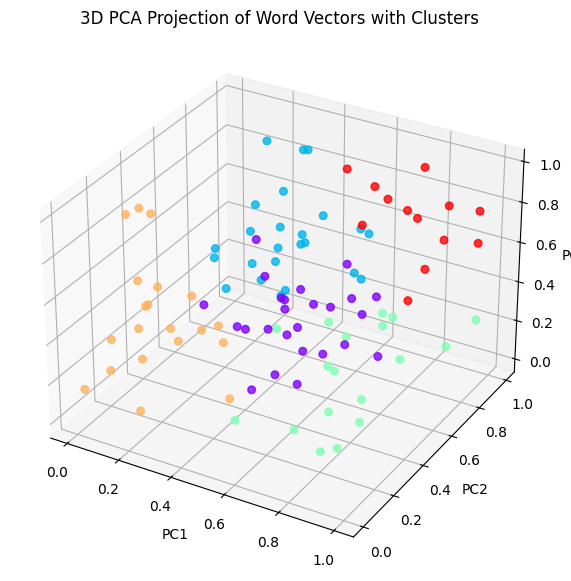

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Let's cluster into, say, 5 groups
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use labels to color points
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
                     c=labels, cmap='rainbow', s=30, alpha=0.8)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D PCA Projection of Word Vectors with Clusters")

plt.show()
